In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from utils import add_tz_and_localtime_column

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flypew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path = "data/"
train_data = pd.read_csv(path + 'train_events.csv')
all_data = pd.read_csv(path + 'all_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

In [45]:
train_data = add_tz_and_localtime_column(train_data)

In [4]:
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


In [5]:
video.head()

,rutube_video_id,title,category,duration,author_id
0,video_185549,Как собрать букет из мыльных тюльпанов - Силик...,Хобби,1559160,1015054
1,video_111035,"Осторожно, Киберземляне!, 1 сезон, 12 серия",Сериалы,1320007,1002180
2,video_476517,ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...,Хобби,606145,1095337
3,video_157198,"Хороший лжец (фильм, 2019)",Фильмы,6577440,1043618
4,video_289824,Нашего старого гнобят по-всякому,Развлечения,859493,1009535


In [6]:
train_data = train_data.merge(targets, on='viewer_uid')
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,age,sex,age_class
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,20,female,0
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,40,female,2
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,23,male,1
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,41,male,3
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,38,female,2


In [7]:
print("Total unique users in train data: ", train_data['viewer_uid'].nunique())
print("Total unique users in all data: ", all_data['viewer_uid'].nunique())

Total unique users in train data:  180012
Total unique users in all data:  960885


In [8]:
print("Total unique videos in train data: ", train_data['rutube_video_id'].nunique())
print("Total unique videos in all data: ", all_data['rutube_video_id'].nunique())

Total unique videos in train data:  126248
Total unique videos in all data:  324450


In [18]:
train_data = train_data.merge(video, on='rutube_video_id')
all_data = all_data.merge(video, on='rutube_video_id')
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,age,sex,age_class,title,category,duration,author_id
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,20,female,0,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,40,female,2,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,23,male,1,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,41,male,3,Сергей Орлов-снял дом!!!,Разное,1522069,1058671
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,38,female,2,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020


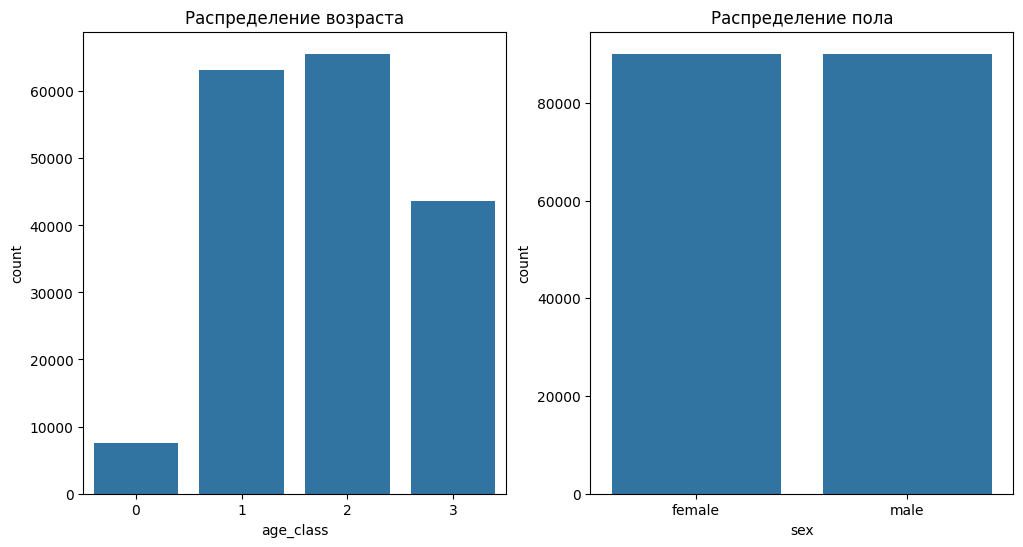

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title("Распределение возраста")
sns.countplot(x='age_class', data=train_data.groupby('viewer_uid').first(), ax=ax[0])
ax[1].set_title("Распределение пола")
sns.countplot(x='sex', data=train_data.groupby('viewer_uid').first(), ax=ax[1])
plt.show()

Задача для пола идеально сбалансирована, а вот для возраста нулевого класса (самые молодые) cильно меньше остальных. В будущем окажется что его также сложнее всех предсказывать так как дети и подростки часто смотрят детский контент с аккаунтов родителей

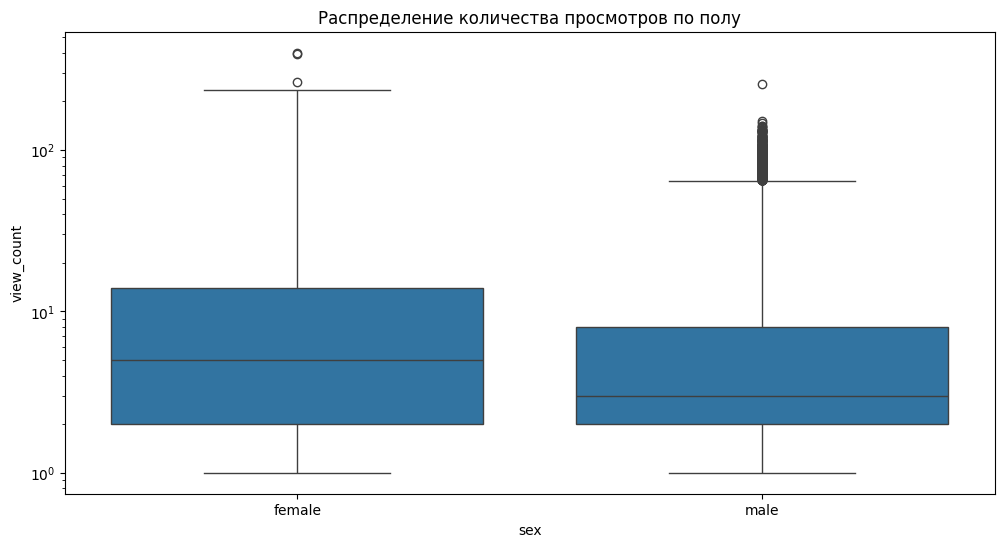

In [15]:
view_count = train_data.groupby('viewer_uid').agg({'viewer_uid': 'count', 'age_class': 'first', 'sex': 'first'}).rename(columns={'viewer_uid': 'view_count'})

f, ax = plt.subplots(figsize=(12, 6))
ax.set_yscale("log")

sns.boxplot(x='sex', y='view_count', data=view_count)
plt.title("Распределение количества просмотров по полу")
plt.show()

Интересный факт что среди самых активных пользователей больше женщин чем мужчин. Этот факт должен помочь модели предсказывать пол 

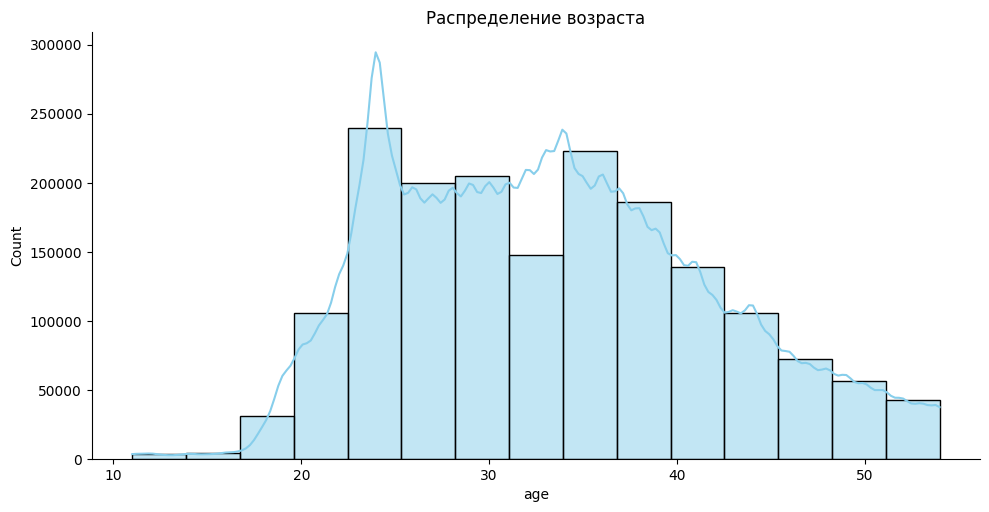

In [17]:
sns.displot(train_data['age'], bins=15, kde=True, aspect=2, color='skyblue')
plt.title("Распределение возраста")
plt.show()

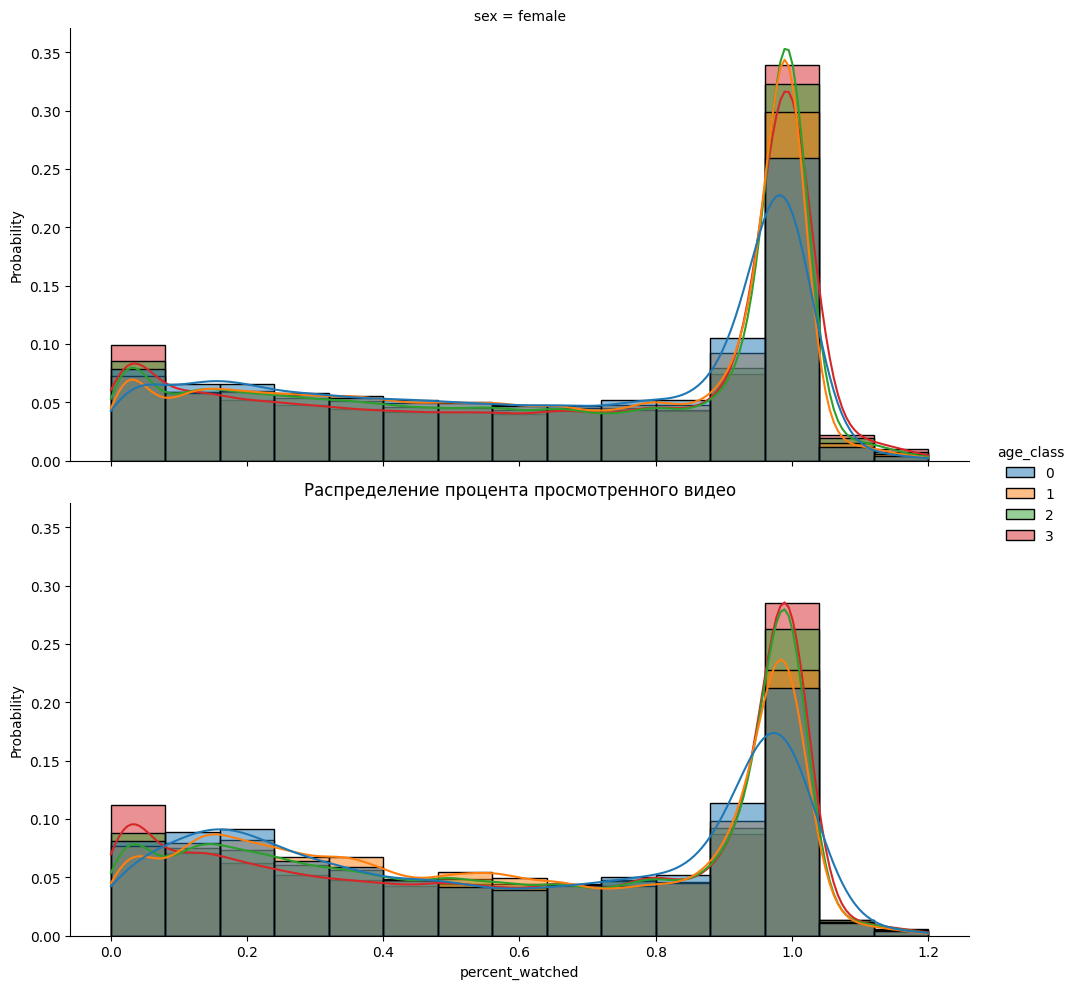

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')

train_data['percent_watched'] = train_data['total_watchtime'] / train_data['duration'] * 1000
palette = sns.color_palette("tab10")
sns.displot(train_data[train_data.percent_watched <= 1.2], 
            x="percent_watched", bins=15, kde=True, hue='age_class', row='sex',
            aspect=2, palette=palette, stat='probability', common_norm=False)
plt.title("Распределение процента просмотренного видео")
plt.show()

Как и можно было ожидать чем моложе пользователь тем ниже вероятность что он досмотрит видео до самого конца. Однако есть интересное исключение - пожилые люди с более высокой вероятностью выходят почти сразу после клика на видео. В каком проценте случаев человек выходит сразу и в каком проценте досматривает до конца - это интересные идеи для признаков

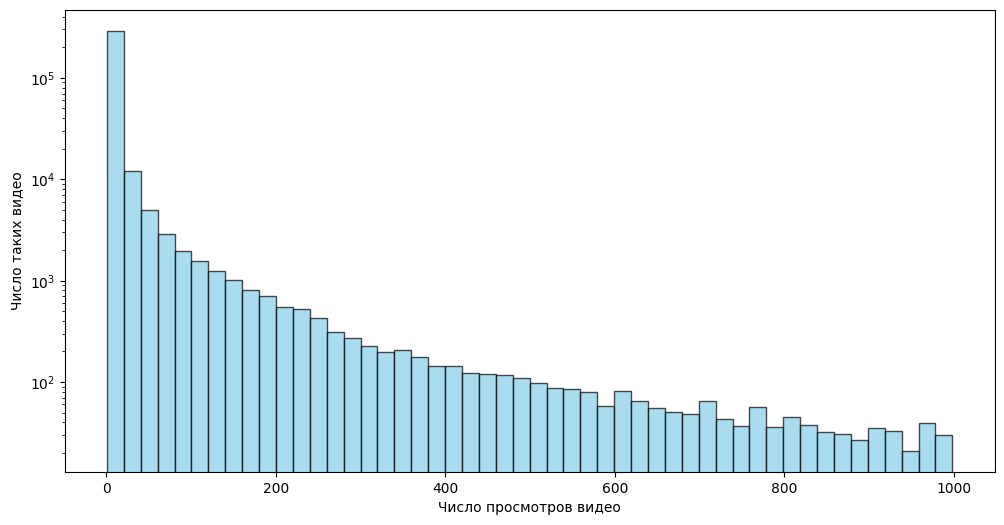

In [29]:
video_stats = all_data.groupby('rutube_video_id').size().reset_index(name='views')

plt.figure(figsize=(12, 6))
plt.hist(video_stats.query('views < 1000')['views'], 
         bins=50, color='skyblue', edgecolor='black', alpha=0.7, log=True)
plt.xlabel('Число просмотров видео')
plt.ylabel('Число таких видео')
plt.show()

Здесь наблюдаем понятную ситуацию - абсолютное большинство видео имеет мало просмоторов. Это затрудняет нам задачу так как по таким видео не получится достоверно рассчитать коллаборативные признаки или подсчитать статистики (такие как средний возраст пользователя, посмотревшего видео)

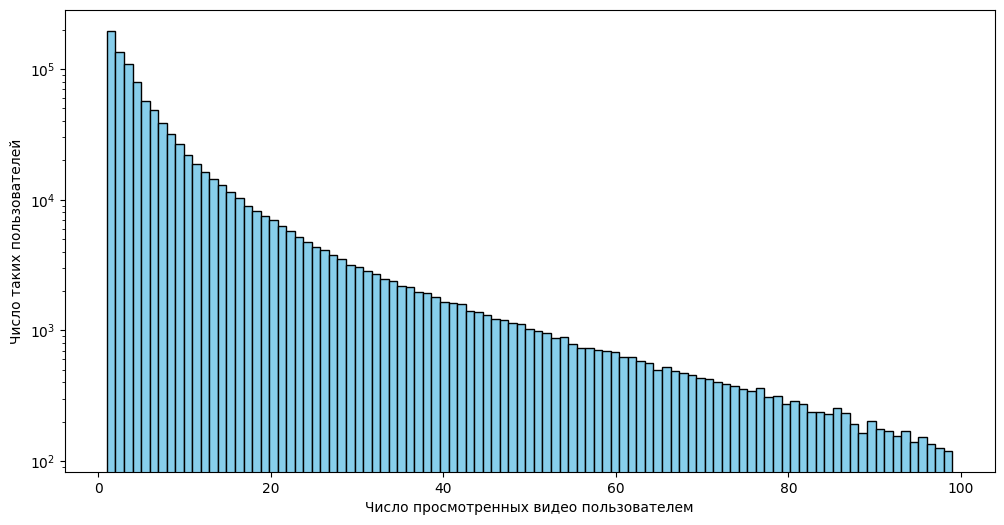

In [30]:
user_stats = all_data.groupby('viewer_uid').size().reset_index().rename(columns={0: 'num_videos_watched'})

plt.figure(figsize=(12, 6))
plt.hist(user_stats.query("num_videos_watched < 100")['num_videos_watched'], bins=99, log=True, color='skyblue', edgecolor='black')
plt.xlabel('Число просмотренных видео пользователем')
plt.ylabel('Число таких пользователей')

plt.show()

С пользователями ситуация ровно такая же

In [31]:
# Вспомогательная таблица с популярностью видео
videos_popularity = all_data.groupby('rutube_video_id')['viewer_uid'].nunique()
videos_popularity.name = 'popularity'
all_data = all_data.merge(videos_popularity, on='rutube_video_id')
all_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,title,category,duration,author_id,popularity
0,2024-06-01 13:08:30+03:00,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,video_395879,10813370,ТАЙНА ДВОРЦОВОГО МОСТА В ПЕТЕРБУРГЕ | А ЧТО ПО...,Лайфстайл,333313,1012572,214
1,2024-06-01 14:30:00+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,video_216518,10512324,"Я художник, я так вижу. Мужское / Женское. Вып...",Телепередачи,2500274,1009219,437
2,2024-06-01 18:48:12+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,video_41225,10951137,ДОРАМЫ ПРО ЛЮБОВЬ ♥ Романтические Фильмы ♥ Кор...,Фильмы,257997,1023998,1
3,2024-06-01 16:32:36+03:00,Moscow,desktop,browser,Windows,Yandex Browser,2324,video_215886,10912434,Менталист / The Mentalist – 4 сезон 13 серия,Сериалы,2363393,1074854,96
4,2024-06-01 00:57:04+03:00,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,video_43631,10223585,Сериал Тёмная материя – 1 сезон 4 серия / Dark...,Сериалы,3589376,1036095,334


100%|██████████| 200/200 [01:35<00:00,  2.10it/s]


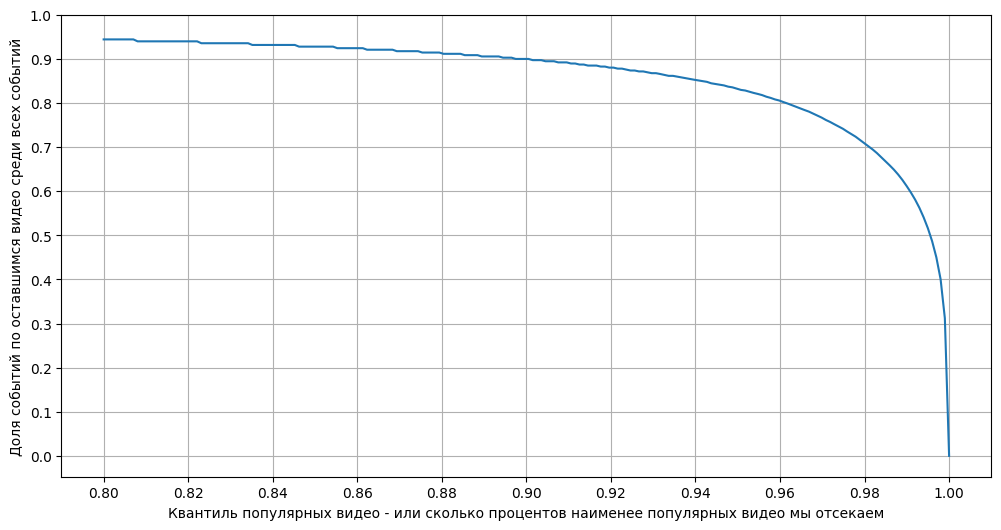

In [35]:
quantiles = np.linspace(0.8, 1, 200)
shares = []
for q in tqdm(quantiles):
    threshold = videos_popularity.quantile(q)
    shares.append(all_data.query(f'popularity > {threshold}').shape[0] / all_data.shape[0])
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(quantiles, shares)
plt.xlabel('Квантиль популярных видео - или сколько процентов наименее популярных видео мы отсекаем')
plt.ylabel('Доля событий по оставшимся видео среди всех событий')
ax.set_xticks(np.linspace(0.8, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

Взяв всего 5% видео мы оставим более 80% событий

100%|██████████| 200/200 [03:51<00:00,  1.16s/it]


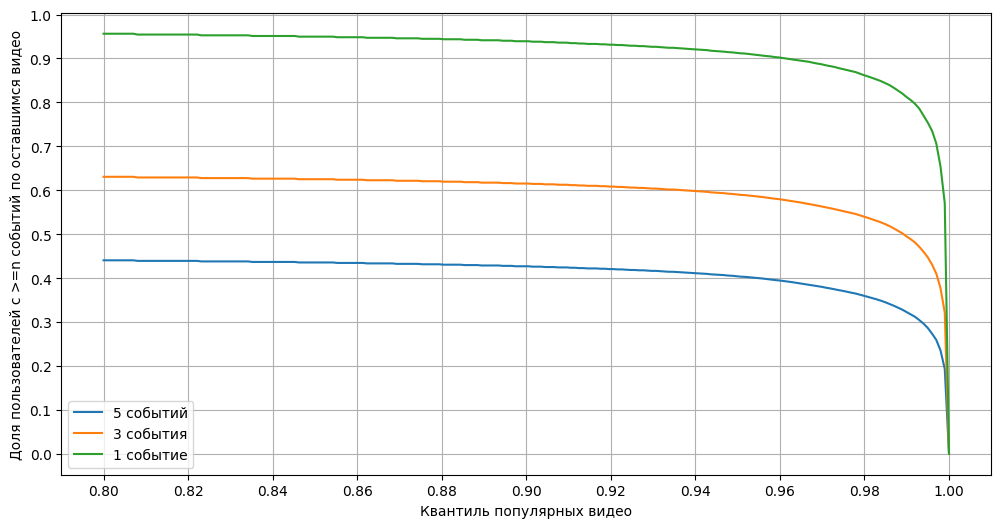

In [39]:
quantiles = np.linspace(0.8, 1, 200)
shares_5 = []
shares_3 = []
shares_1 = []
for q in tqdm(quantiles):
    threshold = videos_popularity.quantile(q)
    all_data_filtered = all_data[all_data.popularity > threshold]
    shares_5.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 5').shape[0] / all_data['viewer_uid'].nunique())
    shares_3.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 3').shape[0] / all_data['viewer_uid'].nunique())
    shares_1.append(all_data_filtered['viewer_uid'].nunique() / all_data['viewer_uid'].nunique())
    
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(quantiles, shares_5)
plt.plot(quantiles, shares_3)
plt.plot(quantiles, shares_1)
plt.legend(['5 событий', '3 события', '1 событие'])
plt.xlabel('Квантиль популярных видео')
plt.ylabel('Доля пользователей с >=n событий по оставшимся видео')
ax.set_xticks(np.linspace(0.8, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

In [41]:
# Аналогично для авторов
author_popularity = all_data.groupby('author_id')['viewer_uid'].nunique()
author_popularity.name = 'author_popularity'
all_data = all_data.merge(author_popularity, on='author_id')
all_data['author_popularity'].head()

0    19544
1    69809
2      164
3     1000
4     9619
Name: author_popularity, dtype: int64

100%|██████████| 200/200 [01:55<00:00,  1.73it/s]


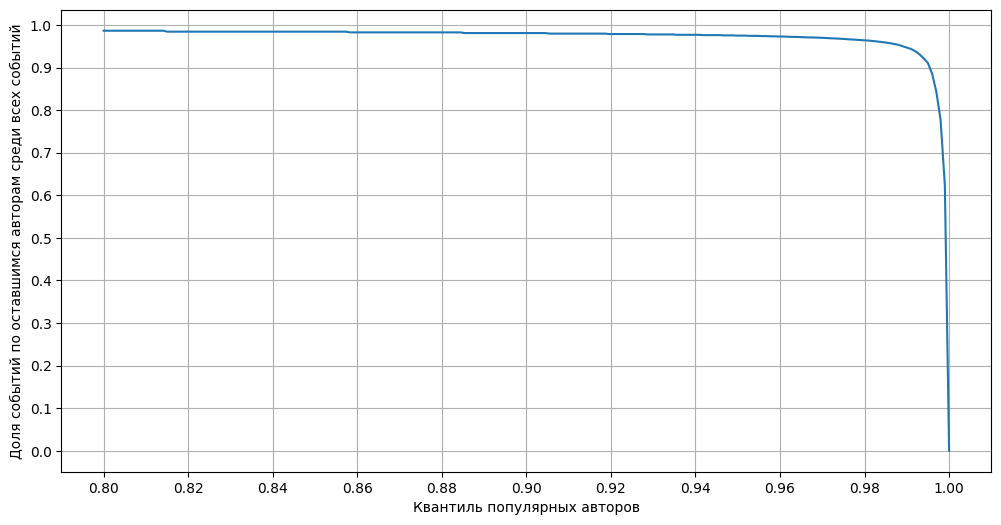

In [42]:
quantiles = np.linspace(0.8, 1, 200)
shares = []
for q in tqdm(quantiles):
    threshold = author_popularity.quantile(q)
    shares.append(all_data.query(f'author_popularity > {threshold}').shape[0] / all_data.shape[0])
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(quantiles, shares)
plt.xlabel('Квантиль популярных авторов')
plt.ylabel('Доля событий по оставшимся авторам среди всех событий')
ax.set_xticks(np.linspace(0.8, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

100%|██████████| 100/100 [02:10<00:00,  1.31s/it]


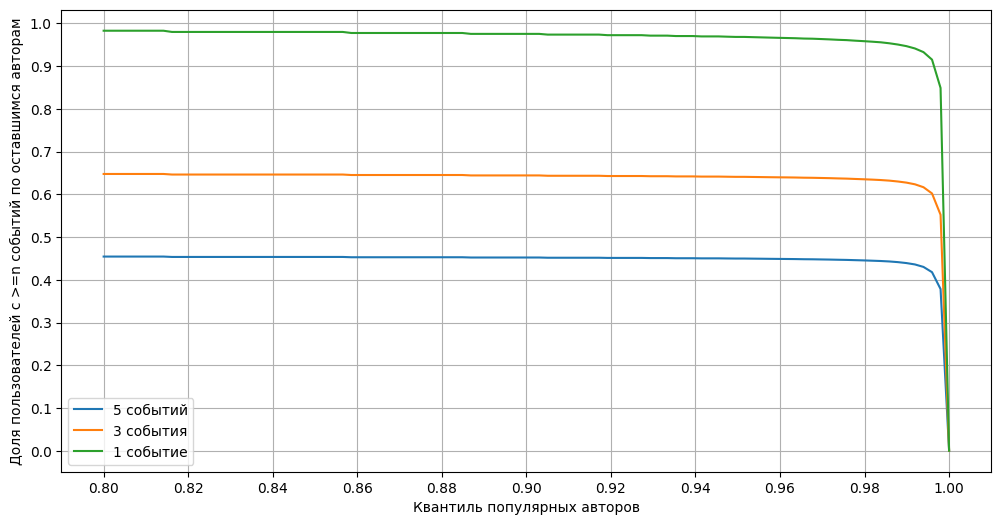

In [43]:
quantiles = np.linspace(0.8, 1, 100)
shares_5 = []
shares_3 = []
shares_1 = []
for q in tqdm(quantiles):
    threshold = author_popularity.quantile(q)
    all_data_filtered = all_data[all_data.author_popularity > threshold]
    shares_5.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 5').shape[0] / all_data['viewer_uid'].nunique())
    shares_3.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 3').shape[0] / all_data['viewer_uid'].nunique())
    shares_1.append(all_data_filtered['viewer_uid'].nunique() / all_data['viewer_uid'].nunique())
    
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(quantiles, shares_5)
plt.plot(quantiles, shares_3)
plt.plot(quantiles, shares_1)
plt.legend(['5 событий', '3 события', '1 событие'])
plt.xlabel('Квантиль популярных авторов')
plt.ylabel('Доля пользователей с >=n событий по оставшимся авторам')
ax.set_xticks(np.linspace(0.8, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

С авторами ситуция еще интереснее - кривая сильнее прижата к углу, то есть подавляющее большинство событий сконцентрировано на паре процентов аворов каналов. А именно - взяв всего 2% всех авторов мы сохраним ~99.5% событий! Это можно использовать выделив самых популярных авторов и применив ALS (которая будет работать очень быстро из за малого числа авторов) для подсчета их эмбеддингов. Так же мы получим эмбеддинги юзеров которые можно использовать в модели

Теперь посмотрим на временные признаки

In [46]:
train_data['hour'] = pd.to_datetime(train_data['local_time'].apply(lambda t: t.replace(tzinfo=None))).dt.hour
train_data['weekday'] = pd.to_datetime(train_data['local_time'].apply(lambda t: t.replace(tzinfo=None))).dt.weekday
train_data['holiday'] = train_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

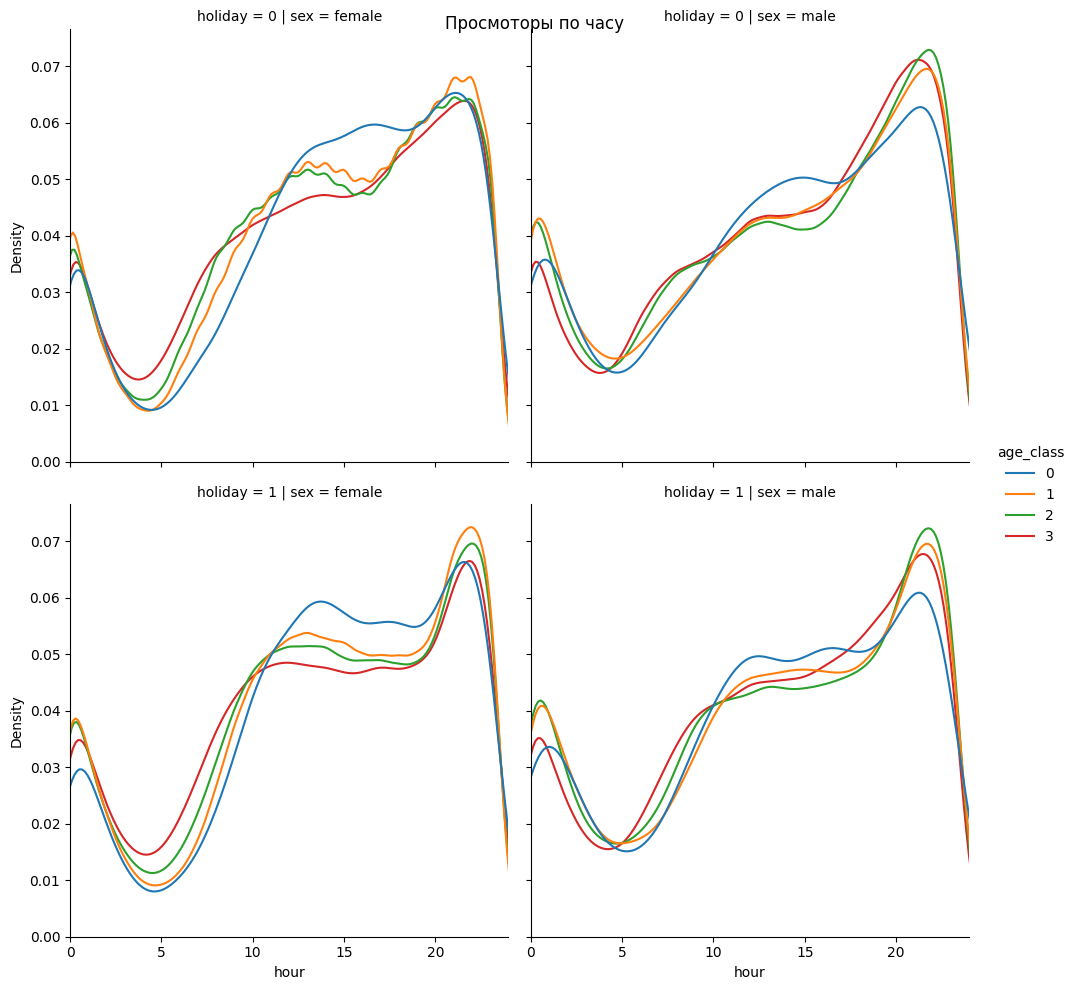

In [49]:
sns.displot(kind='kde', x='hour', data=train_data, palette='tab10',
            hue='age_class', common_norm=False, col='sex', row='holiday')
plt.suptitle("Просмоторы по часу")
plt.xlim(0, 24)
plt.show()

Как и ожидалось большая часть просмотров приходится на вечер когда люди возвращаются с работы или учебы. При этом самые молодые и самые старые реже смотрят видео в 12 часов ночи

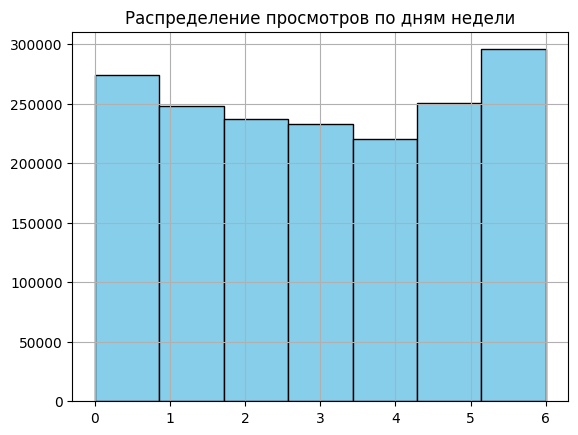

In [53]:
train_data.weekday.hist(bins=7, color='skyblue', edgecolor='black')
plt.title("Распределение просмотров по дням недели")
plt.show()

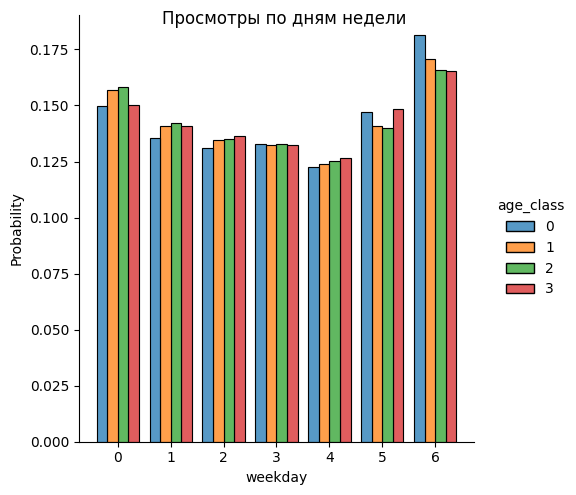

In [70]:
sns.displot(kind='hist', x='weekday', data=train_data, palette='tab10', multiple='dodge',
            hue='age_class', discrete=True, stat='probability', common_norm=False, shrink=0.8)
plt.suptitle("Просмотры по дням недели")
plt.show()

Каких то значительных различий в поведении пользователей по дням недели в зависимости от возраста не заметно. Как и ожидалось больше активности в выходные

## Названия видео

In [74]:
titles = train_data['title'].tolist()

import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

nltk.download('stopwords')
mystem = Mystem()
russian_stopwords = stopwords.words("russian")
english_stopwords = stopwords.words("english")
stopwords = russian_stopwords + english_stopwords

def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stopwords and token != " " and token.strip() not in punctuation]
    text = " ".join(tokens)
    return text

titles = [preprocess_text(title) for title in tqdm(titles)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flypew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 1759616/1759616 [06:27<00:00, 4546.11it/s]


Общее облако слов


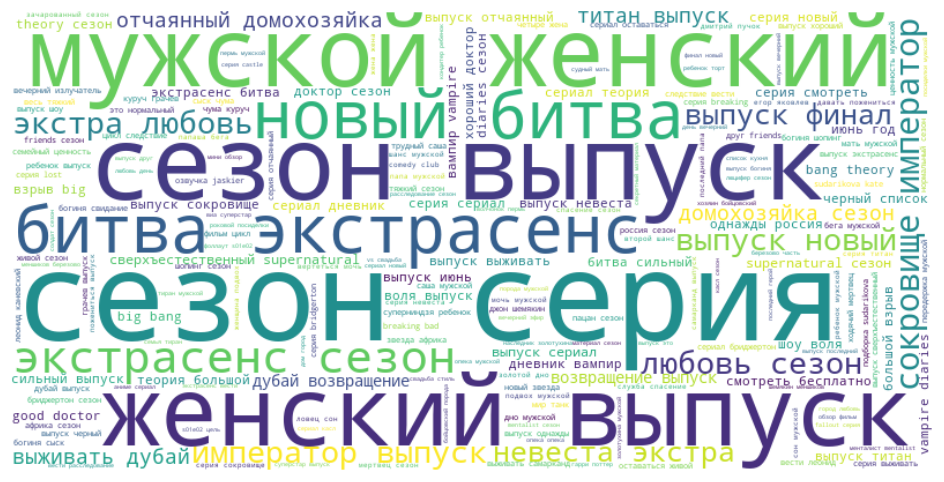

In [75]:
from wordcloud import WordCloud

def create_wordcloud(titles):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(titles))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
print("Общее облако слов")
create_wordcloud(titles)

Облако слов для женщин


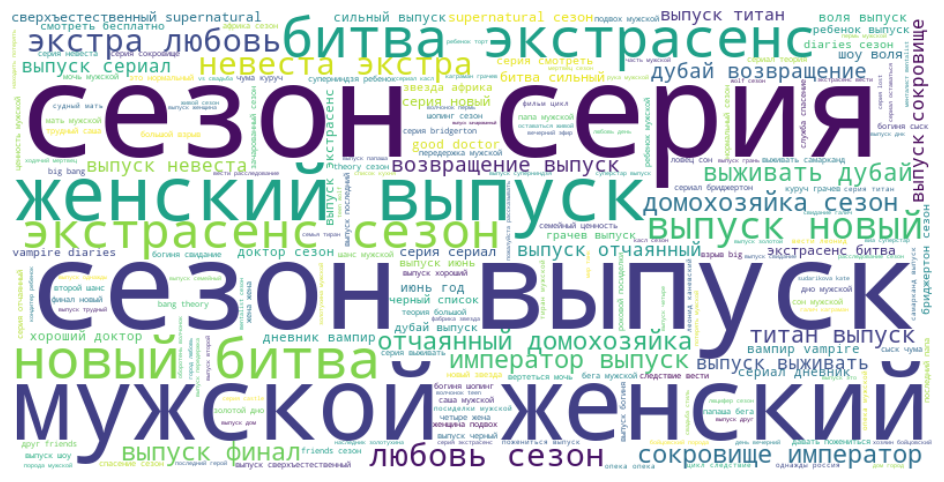

In [76]:
print("Облако слов для женщин")
female_titles = np.array(titles)[train_data[train_data.sex == 'female'].index]
create_wordcloud(female_titles)

Облако слов для мужчин


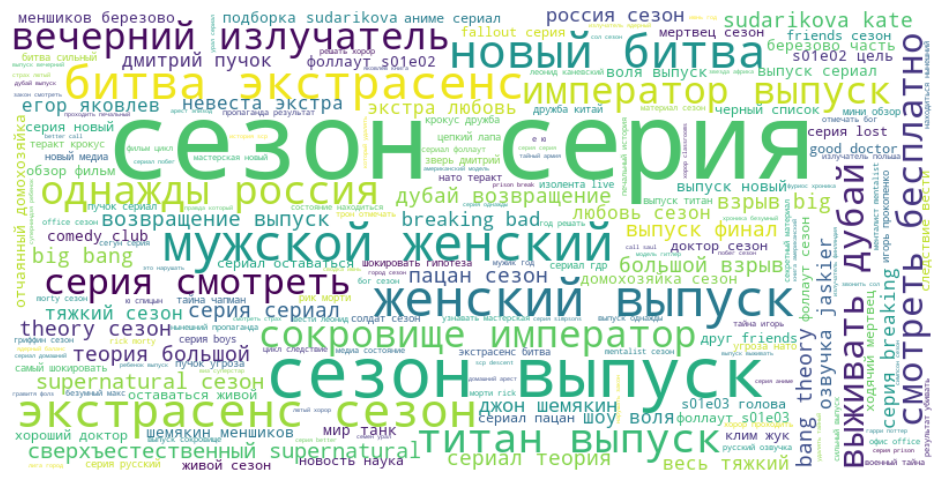

In [77]:
print("Облако слов для мужчин")
male_titles = np.array(titles)[train_data[train_data.sex == 'male'].index]
create_wordcloud(male_titles)

Хоть и не строго но здесь уже можно увидеть разницу в распределении сериалов/программ по полам. Поэтому стоит создать признаки на основе этого - это реализовано в BagOfWordsExtractor